In [1]:
from fastai.vision.all import *

In [2]:
def label_func(f):
    f = str(f)
    if 'good' in f:
        #print(f, 'good')
        return 'good'
    elif 'bad' in f:
        #print(f, 'bad')
        return 'bad'
    #print(f, 'lol none?')

In [3]:
files = get_image_files('no_class/good') + get_image_files('no_class/bad')
dls = ImageDataLoaders.from_path_func("no_class", files, label_func, item_tfms=Resize(224))

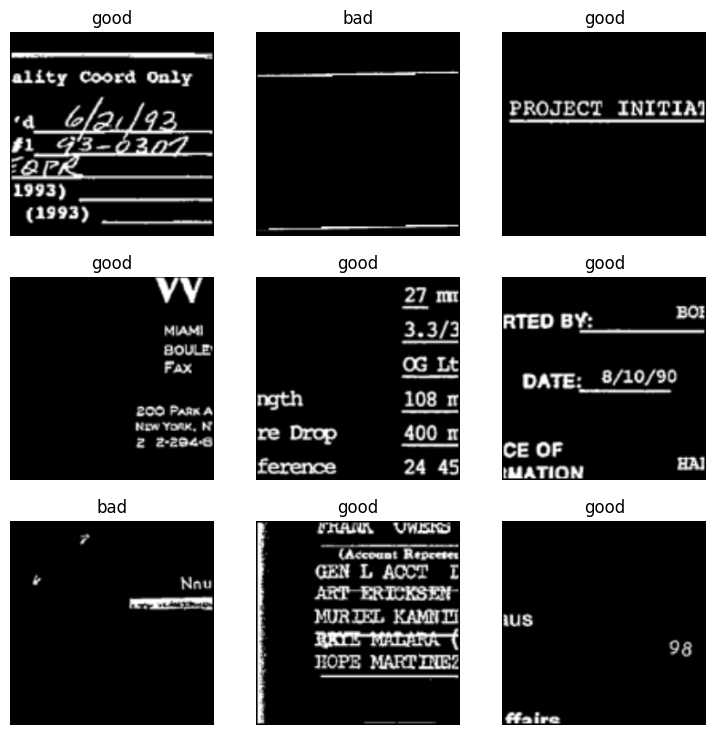

In [4]:
dls.show_batch()

In [5]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.832142,0.566146,0.250482,06:45


epoch,train_loss,valid_loss,error_rate,time
0,0.485077,0.466131,0.134875,08:56


In [6]:
import shutil

Тысячу картинок я разметил, дальше оно само пошло
Обучение: err_rate 0.25

In [8]:
files = get_image_files('no_class')
for file in files:
    print(file, str(file), learn.predict(file))
    
    if learn.predict(file)[0] == 'good':
        shutil.move(str(file), 'no_class\\nn_good')
    elif learn.predict(file)[0] == 'bad':
        shutil.move(str(file), 'no_class\\nn_bad')